# Neuronas lineales adaptativas (ADALINE)

El algoritmo **Adaline** (Adaptive Linear Neuron) es particularmente interesante porque ilustra conceptos fundamentales en el aprendizaje automático, como la definición y minimización de funciones de coste continuas. Estos conceptos son esenciales para entender algoritmos más avanzados de clasificación, como la **regresión logística**, las **máquinas de vectores de soporte** (SVM) y los modelos de regresión.

## Diferencias entre Adaline y el Perceptrón

Una diferencia clave entre **Adaline** y el **perceptrón de Rosenblatt** radica en cómo se actualizan los pesos. Mientras que el perceptrón utiliza una función de activación basada en un **escalón unitario**, Adaline utiliza una **función de activación lineal**. En Adaline, la actualización de los pesos se realiza después de evaluar todo el conjunto de datos, mientras que en el perceptrón, los pesos se actualizan tras cada muestra de entrenamiento. Este enfoque en Adaline se conoce como **descenso de gradiente en lotes**, ya que se ajustan los pesos considerando todas las muestras de una vez.

En Adaline, la función de activación lineal, representada por $\phi(z)$, es simplemente el producto escalar de los pesos y las entradas de la red:
$$\phi\left(\mathbf{w}^T\mathbf{x}\right) = \mathbf{w}^T\mathbf{x}$$
Mientras que esta función de activación lineal se emplea para ajustar los pesos, el algoritmo sigue utilizando una **función umbral** para realizar la predicción final, que es similar a la función escalón del perceptrón. Es decir, aunque los pesos se ajustan basándose en valores continuos, la predicción final será una etiqueta de clase discreta (por ejemplo, +1 o -1), utilizando una función umbral que se aplica sobre la salida lineal.

**Adaline** compara las etiquetas verdaderas de las clases con los valores continuos generados por la función de activación lineal para calcular el error. Esta es otra diferencia importante respecto al perceptrón, que compara directamente las etiquetas verdaderas con las etiquetas de clase predichas.

## Minimizar la función de coste con el descenso del gradiente

En Adaline, la función de coste se define como la **Suma de Errores Cuadráticos (SSE)** entre la salida calculada y la etiqueta de clase verdadera:
$$J(\mathbf{w}) = \frac{1}{2} \sum_i \left( y^{(i)} - \phi\left(z^{(i)}\right) \right)^2$$
Esta función de coste es convexa y diferenciable, lo que permite aplicar el algoritmo de **descenso del gradiente** para minimizarla. El objetivo es encontrar los pesos que minimicen esta función de coste ajustando los pesos actuales:
$$\mathbf{w} := \mathbf{w} + \Delta\mathbf{w}$$
donde $\Delta\mathbf{w}$ representa el cambio en los pesos, calculado como el **gradiente negativo** multiplicado por la tasa de aprendizaje $\eta$:
$$\Delta\mathbf{w} = -\eta \nabla J(\mathbf{w})$$
El gradiente de la función de coste se obtiene calculando la derivada parcial con respecto a cada peso $w_j$:
$$\frac{\partial J}{\partial w_j} = -\sum_i \left( y^{(i)} - \phi\left(z^{(i)}\right) \right) x_j^{(i)}$$
Esto lleva a la expresión del gradiente:
$$\nabla J(\mathbf{w}) = - \left( \mathbf{y} - \phi(\mathbf{z}) \right)^T X$$
donde $X$ es la matriz de datos de entrada, cuyas filas son las muestras de entrenamiento.

Finalmente, el cambio en los pesos se expresa como:
$$\Delta\mathbf{w} = \eta \left( \mathbf{y} - \phi(\mathbf{z}) \right)^T X$$
y los pesos se actualizan con la fórmula:
$$\mathbf{w} := \mathbf{w} + \eta \left( \mathbf{y} - \phi(\mathbf{z}) \right)^T X$$

Aunque superficialmente la regla de aprendizaje de Adaline puede parecer similar a la del perceptrón, la diferencia radica en que $\phi\left(z^{(i)}\right)$ es un valor continuo y no una etiqueta de clase categórica. Además, la actualización de los pesos en Adaline se realiza evaluando todo el conjunto de datos, mientras que en el perceptrón, los pesos se ajustan después de procesar cada muestra de manera incremental. Esto hace que Adaline utilice el enfoque de **descenso de gradiente en lotes**, una técnica más robusta que facilita la convergencia en problemas donde la función de coste es continua, diferenciable y convexa.

En resumen, **Adaline** constituye un importante paso hacia algoritmos más sofisticados de aprendizaje automático y permite el uso de métodos optimizados como el descenso del gradiente para ajustar los parámetros de los modelos de manera eficiente. La capacidad de definir y minimizar una función de coste diferenciable hace que Adaline sea una base fundamental para comprender los algoritmos más avanzados utilizados hoy en día en clasificación y regresión.

### Implementación del algoritmo

In [40]:
import numpy as np

class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta 
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)        
            self.w_[1:] += self.eta * X.T.dot(errors)            
            self.w_[0] += self.eta * errors.sum()            
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

Observa que el método `activation` no modifica los resultados del modelo, ya que es una función identidad. Sin embargo, lo hemos incluido para ilustrar el flujo de información en una red neuronal de una sola capa, siguiendo el proceso típico: desde las características de los datos de entrada, se calcula la entrada neta, luego se aplica la función de activación y, finalmente, se obtiene la salida del modelo. Aunque aquí la activación es lineal, veremos más adelante cómo el clasificador de regresión logística utiliza una activación no lineal. En efecto, el modelo de regresión logística y Adaline están estrechamente relacionados, diferenciándose principalmente en sus funciones de activación y de coste.

Similar a la implementación del perceptrón, registramos los valores de la función de coste en una lista, `self.cost_`, para monitorizar el comportamiento del algoritmo durante el entrenamiento. Esto permite evaluar si el algoritmo está convergiendo adecuadamente, es decir, si los errores disminuyen progresivamente a lo largo de las iteraciones. Al analizar `self.cost_`, podemos determinar si el modelo ha alcanzado un mínimo en la función de coste, lo cual indicaría que está aprendiendo de manera efectiva a partir de los datos.

En la práctica, ajustar la tasa de aprendizaje, $\eta$, es fundamental para una convergencia óptima, y a menudo requiere experimentación. Por lo tanto, probaremos con distintos valores, como $\eta = 0.1$ y $\eta = 0.0001$, y visualizaremos las funciones de coste frente al número de épocas para observar cómo el modelo Adaline aprende de los datos de entrenamiento.

### Cargar dataset Iris

In [41]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

X = df.iloc[0:100, [0, 2]].values

Ahora veamos en un diagrama el coste contra el número de épocas para los dos rangos de aprendizaje.

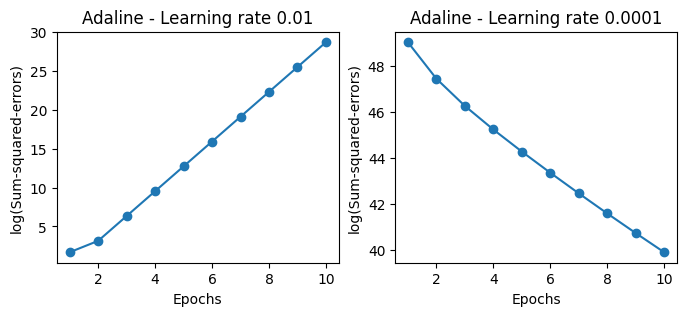

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-errors)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-errors)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

Como se observa en los diagramas de la función de coste, nos encontramos con dos tipos de problemas. En el gráfico de la izquierda, podemos ver el resultado de seleccionar un rango de aprendizaje demasiado amplio. En lugar de minimizar la función de coste, el error aumenta en cada época, ya que sobrepasa repetidamente el mínimo global. En contraste, el diagrama de la derecha muestra una reducción en el coste, pero el rango de aprendizaje elegido, $\eta = 0.0001$, es tan pequeño que el algoritmo requeriría un número de épocas muy elevado para converger al mínimo global. 

En la figura siguiente, la imagen de la izquierda muestra una elección apropiada del rango de aprendizaje, en la cual el coste disminuye de manera progresiva hacia el mínimo global. Por otro lado, la imagen de la derecha ilustra el efecto de seleccionar un rango de aprendizaje excesivamente alto: el algoritmo sobrepasa repetidamente el mínimo global en cada iteración, impidiendo su convergencia.


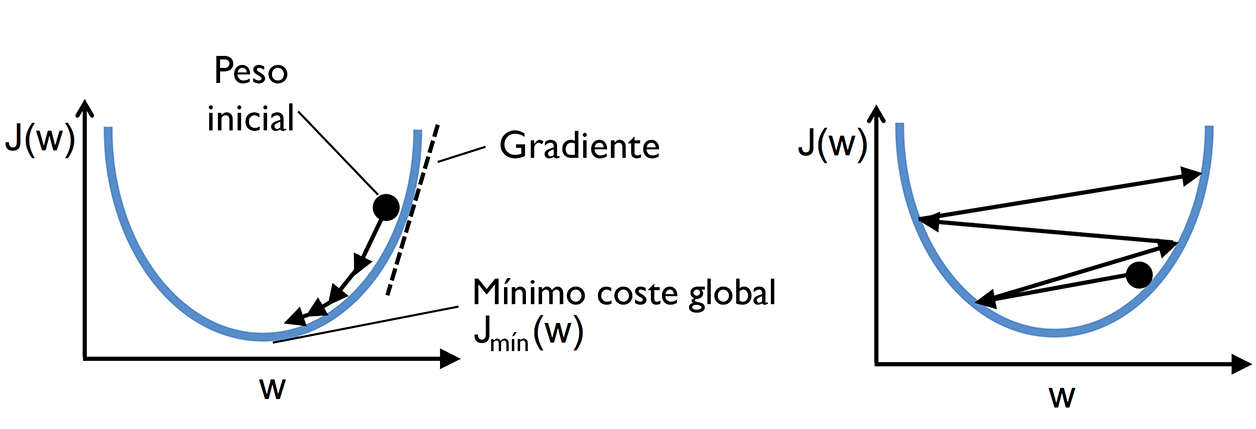

In [50]:
from IPython.display import Image

Image(filename='../resources/Capitulo02/images/02_12.png', width=600)

## Mejorar el descenso del gradiente mediante el escalado de características

Muchos algoritmos de aprendizaje automático requieren algún tipo de escalado de características para un rendimiento óptimo. 

El descenso del gradiente es uno de los algoritmos que se benefician considerablemente del escalado, ya que este ajuste facilita que el algoritmo realice pasos más estables y converja más rápidamente hacia el mínimo de la función de coste. En esta sección, utilizaremos un método de escalado llamado **normalización**, que ajusta nuestros datos para que cada característica tenga una **media de cero** y una **desviación estándar de 1**.

Es importante aclarar que, aunque la normalización centra los datos y los escala, esto **no convierte necesariamente la distribución de los datos en normal** (es decir, no transforma los datos en una curva en forma de campana). En cambio, simplemente asegura que todas las características se encuentren en una escala comparable, lo cual ayuda al descenso del gradiente a actuar de manera más eficaz.

Para normalizar una característica $j$, se puede restar la media de la muestra $\mu_j$ de cada muestra de entrenamiento y dividir el resultado por la desviación estándar $\sigma_j$ de la característica:

$$\mathbf{x'}_j = \dfrac{\mathbf{x}_j - \mu_j}{\sigma_j}$$

Este procedimiento permite que el algoritmo de descenso del gradiente avance a un ritmo más uniforme en todas las características, mejorando la velocidad y estabilidad de la convergencia sin modificar la forma original de la distribución de los datos.

El escalado de características mejora el rendimiento del descenso del gradiente debido a cómo afectan las diferencias de escala entre características al proceso de optimización. Estas son las razones principales:

1. **Facilita el avance uniforme hacia el mínimo global**
   - Cuando las características no están escaladas, algunas pueden tener valores mucho más grandes que otras, lo cual genera gradientes de diferentes magnitudes para cada característica.
   - Esto provoca que el descenso del gradiente tenga que ajustar sus pasos para adaptarse a estas diferencias. En la práctica, los pasos que toma el algoritmo en cada iteración pueden ser **desiguales** y moverse más rápidamente en unas direcciones que en otras. Como resultado, el algoritmo da "vueltas" alrededor del mínimo en lugar de avanzar de manera directa, lo cual hace que la convergencia sea más lenta.

2. **Evita el estancamiento en ciertos parámetros**
   - Sin el escalado, el descenso del gradiente podría quedar "atrapado" en algunos parámetros de gran escala, al hacerles frente con pasos demasiado pequeños. Esto sucede cuando la magnitud de los gradientes varía mucho entre las características, ya que el optimizador avanza muy poco en las direcciones de gradiente grandes (para evitar saltar fuera de la zona de mínimo), mientras que avanza rápidamente en las direcciones de gradiente pequeño.
   - El escalado de las características hace que el algoritmo trate cada parámetro de manera **proporcional**, permitiendo que el optimizador avance de manera equilibrada y eficiente.

3. **Reduce la dependencia del valor de la tasa de aprendizaje**
   - Sin escalado, ajustar una tasa de aprendizaje adecuada puede ser complicado, ya que ésta debe adaptarse a los diferentes rangos de valores entre las características. Esto hace que la tasa de aprendizaje óptima varíe, y podría no ser lo suficientemente buena para todas las características a la vez.
   - Con características escaladas, el descenso del gradiente puede funcionar de manera efectiva con una tasa de aprendizaje más uniforme, ya que las características están en un rango similar.

4. **Mejora la estabilidad numérica**
   - Con datos en diferentes escalas, el cálculo de gradientes y actualizaciones puede llevar a problemas de precisión numérica, especialmente en entornos donde se usan puntos flotantes. Estos problemas pueden ralentizar la convergencia o incluso hacer que el algoritmo diverja.
   - Escalar los datos ayuda a mantener los valores dentro de un rango más manejable, lo que evita posibles errores de precisión.

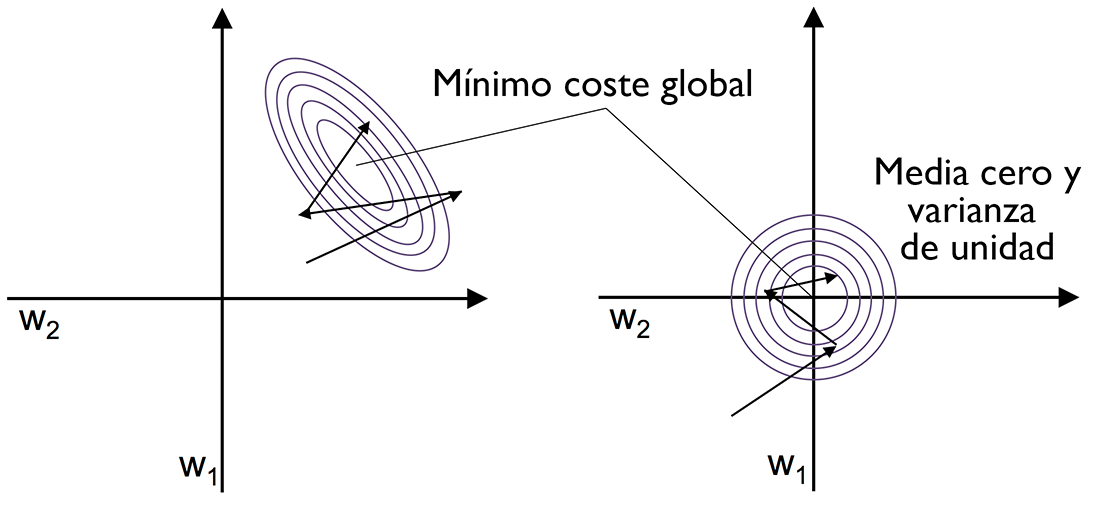

In [44]:
Image(filename='../resources/Capitulo02/images/02_13.png', width=500)

La normalización se puede conseguir fácilmente mediante el método integrado de NumPy `mean` y `std`:

In [45]:
X_std = np.copy(X)
X_std[:, 0] = (X_std[:, 0] - X_std[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X_std[:, 1] - X_std[:, 1].mean()) / X[:, 1].std()

Tras la normalización, volvemos a entrenar Adaline y veremos que ahora converge después de un pequeño número de épocas con un rango de aprendizaje $\eta=0.01$:

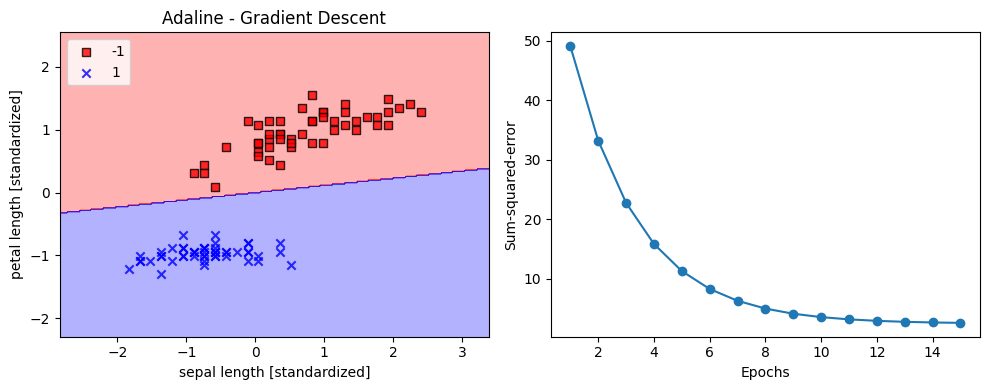

In [ ]:
import sys
sys.path.append('../')

from utils import plot_decision_regions

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada, ax=ax[0])
ax[0].set_title('Adaline - Gradient Descent')
ax[0].set_xlabel('sepal length [standardized]')
ax[0].set_ylabel('petal length [standardized]')
ax[0].legend(loc='upper left')

ax[1].plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

## Aprendizaje automático a gran escala y descenso del gradiente estocástico

En la sección anterior, vimos cómo minimizar la función de coste avanzando en la dirección opuesta al gradiente de coste, calculado a partir de un conjunto de entrenamiento completo. Este método se conoce como **descenso de gradiente en lotes**. Sin embargo, si tenemos un conjunto de datos extenso, con millones de puntos, como es común en aplicaciones de aprendizaje automático, ejecutar el descenso de gradiente en lotes puede ser computacionalmente costoso, ya que en cada paso hacia el mínimo global necesitamos reevaluar el conjunto completo de datos de entrenamiento.

Una alternativa conocida al descenso de gradiente en lotes es el **descenso de gradiente estocástico** (también llamado “descenso de gradiente *online*” o “iterativo”). En lugar de actualizar los pesos según la suma de los errores acumulados en todas las muestras $\mathbf{x}^{(i)}$:
$$\Delta\mathbf{w} = \eta \left( \mathbf{y} - \phi(\mathbf{z}) \right)^T X$$

el descenso de gradiente estocástico actualiza los pesos de forma incremental para cada muestra de entrenamiento individual:
$$\Delta\mathbf{w} = \eta \left( \mathbf{y} - \phi(\mathbf{z}) \right)^T \mathbf{x}^{(i)}$$

Aunque el descenso de gradiente estocástico puede considerarse una aproximación del descenso en lotes, suele converger más rápido debido a las actualizaciones de pesos más frecuentes. Al calcular cada gradiente usando solo una muestra, la superficie de error (es decir, la gráfica de la función de coste) se vuelve más ruidosa en comparación con el descenso en lotes. Este ruido permite al descenso de gradiente estocástico escapar de mínimos locales poco profundos con mayor facilidad, lo cual es particularmente útil al trabajar con funciones de activación no lineales, como veremos más adelante. Para obtener buenos resultados, es esencial presentar los datos de entrenamiento en orden aleatorio y barajar el conjunto en cada época, evitando así ciclos.

> En implementaciones de descenso de gradiente estocástico, el rango de aprendizaje fijo $\eta$ suele reemplazarse por un rango de aprendizaje adaptativo que disminuye con el tiempo, por ejemplo:
> $$\frac{c_1}{\text{número de iteraciones} + c_2}$$
> donde $c_1$ y $c_2$ son constantes. Esto permite que el descenso de gradiente estocástico no llegue exactamente al mínimo global, pero se acerque a una región muy próxima a él. Además, el uso de un rango de aprendizaje adaptativo ayuda a acercarse aún más al coste mínimo.

Otra ventaja del descenso de gradiente estocástico es que se puede aplicar para **aprendizaje online**. En este contexto, el modelo se entrena continuamente a medida que llegan nuevos datos de entrenamiento. Esto es especialmente útil cuando se acumulan grandes volúmenes de datos, como datos de clientes en aplicaciones web. Con el aprendizaje *online*, el sistema puede adaptarse rápidamente a cambios en los datos, y además, los datos de entrenamiento pueden descartarse después de actualizar el modelo, lo cual es beneficioso si hay limitaciones de almacenamiento. 